# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

In [1]:
install.packages("beepr")
install.packages("tidyverse")
install.packages("sjPlot")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘audio’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




In [2]:
library(beepr)
library(tidyverse)
library(sjPlot)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘sjPlot’


The following object is masked from ‘package:ggplot2’:

    set_theme




In [3]:
beep("mario")


Warning message in value[[3L]](cond):
“beep() could not play the sound due to the following error:
Error in play.default(x, rate, ...): no audio drivers are available
”


Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [5]:
#read the csv file and
data  = read.csv("/Hummingbird_data.csv", stringsAsFactors = FALSE)


In [6]:
colnames(data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

In [7]:
list.files("/content")


[1] "sample_data"

In [12]:
# Dimensions of the data
nrow(data)
ncol(data)


[1] 6908

[1] 12

**Q2. How many rows and columns are in the datafame**  
1 point

rows: 6908 columns: 12

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [8]:
str(data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [13]:
# Identify data types of each column
data_types = sapply(data, class)
print(data_types)

          Admitted Disposition_binary              Place              F_Aid 
       "character"        "character"        "character"        "character" 
         Species_e              Sex_e              Age_e   Brought_in_after 
       "character"        "character"        "character"          "integer" 
            season                  r       Green_Orange                 ID 
       "character"        "character"        "character"        "character" 


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [10]:
library(dplyr)
model_data = sample_n(data, 5000)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

rows: 5000 columns:12

In [15]:
nrow(model_data)
ncol(model_data)


[1] 5000

[1] 12

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

categorical: 11
continuous: 1

In [16]:
# Check data types
data_types = sapply(data, class)

# Categorical = character or factor
categorical_vars = names(data_types[data_types %in% c("character", "factor")])


# Continuous = numeric or integer
continuous_vars = names(data_types[data_types %in% c("numeric", "integer")])

# Print results
categorical_vars
continuous_vars

length(categorical_vars)
length(continuous_vars)


[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "season"             "r"                 
[10] "Green_Orange"       "ID"

[1] "Brought_in_after"

[1] 11

[1] 1

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [17]:
write.csv(model_data, "/Hummingbird_data_MehrnazNiazi.csv", row.names = FALSE)

In [18]:
library(ggplot2)

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [19]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4154
Santa Barbara,67
malibu,779


In [29]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [30]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

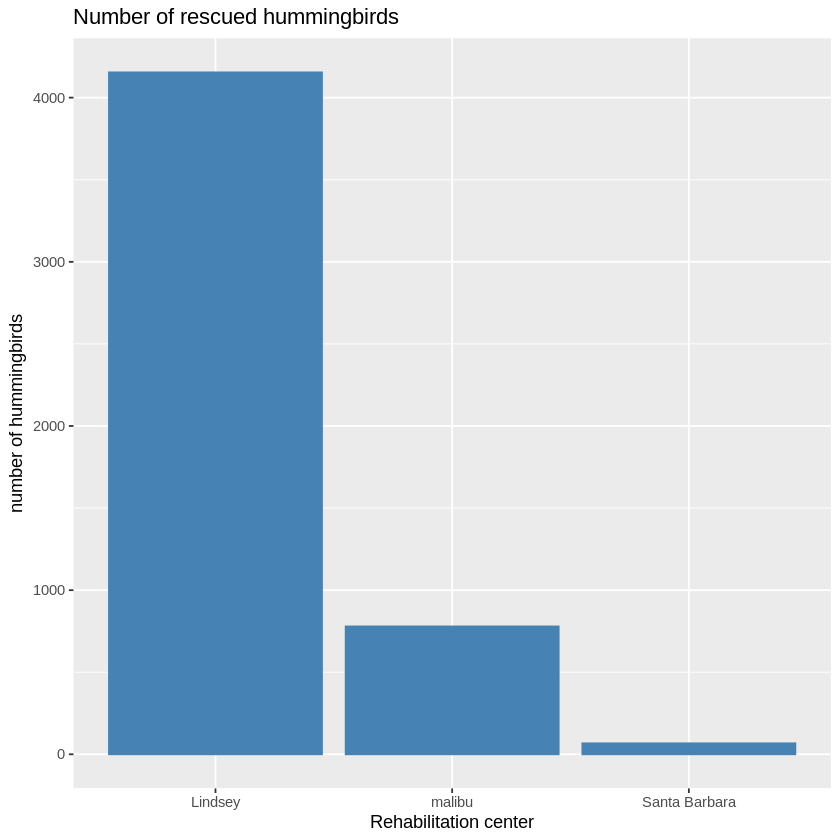

In [31]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [34]:
ggsave(
  filename = "/rehab_hummingbirds_plot.pdf",
  plot = p,
  width = 4,
  height = 3,
  units = "in"
)

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

* model_data %>% : passes the dataset to the next command.
* group_by(Place): groups the data by rehabilitation center.
* summarise(count = n_distinct(ID)) : calculates how many unique birds (IDs) were admitted to each center.
* The object p : stores the plot, which I then saved to PDF.
* ggplot(rehab, aes(x = Place, y = count)) + : starts a plot using the summary table.
* geom_bar(stat="identity") draws bars whose heights equal the actual counts.
* xlab() and ylab() label the axes.
* labs(title = "Number of rescued hummingbirds"): adds a title to the plot.
* ggsave(...): saves the plot into a file.
* filename sets the PDF name.
* plot = p: tells R which plot to save.
* width and height: define the plot size in inches.


# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

* Across the five covariates (Age_e, Sex_e, Place, F_Aid, and season), several clear patterns emerge:

Age_e: Adult-like birds have extremely high mortality compared with nestlings.
This shows a strong association between age and outcome.

Sex_e: Sex also shows noticeable differences. “Female-like” birds have much higher mortality in absolute numbers.
Males and unknown-sex birds show different death vs. release patterns as well. However, interpretation is limited because “Female-like” represents the majority of the dataset. The imbalance makes it unclear whether sex truly affects survival or whether it reflects skewed sampling.

Place: Rehabilitation centers show clear survival differences. Lindsey has far more birds and far more deaths than other centers. This suggests the outcome is strongly associated with location, likely due to differences in caseload, injury severity, or facility capacity.

First Aid: Birds that received first aid appear more likely to be released.This indicates a meaningful association between early intervention and survival.

Season: Season shows strong patterns. Spring and summer have far more admissions and higher mortality than fall or winter. This suggests seasonality affects survival, likely via environmental stressors.

* Are they associated with final disposition?

Strong associations: Age_e, Place, F_Aid, Season
Likely association but limited by sample imbalance: Sex_e

So yes, several covariates appear associated, but not all with equal strength.

* Recommended statistical tests

To evaluate the associations formally:
Chi-square tests for categorical predictors with adequate cell counts

Univariate logistic regression to quantify the effect of each covariate

Multivariable logistic regression to control for confounding between predictors

These tests would confirm whether the visual differences are statistically significant.


In [ ]:
df = model_data  %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(Age_e, Disposition_binary))

`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.


In [ ]:
df

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,1
Nestling,Released,1
adult-like,Died,1
adult-like,Released,1


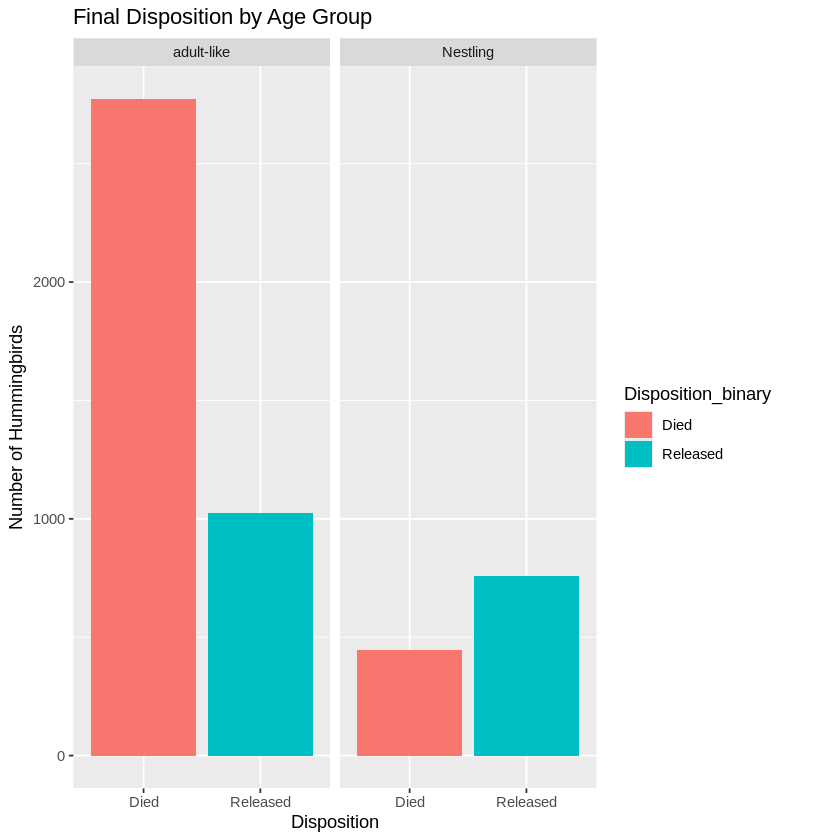

In [43]:
df_age = model_data %>%
  group_by(Age_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_age, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Age_e) +
  labs(title = "Final Disposition by Age Group",
       x = "Disposition",
       y = "Number of Hummingbirds")



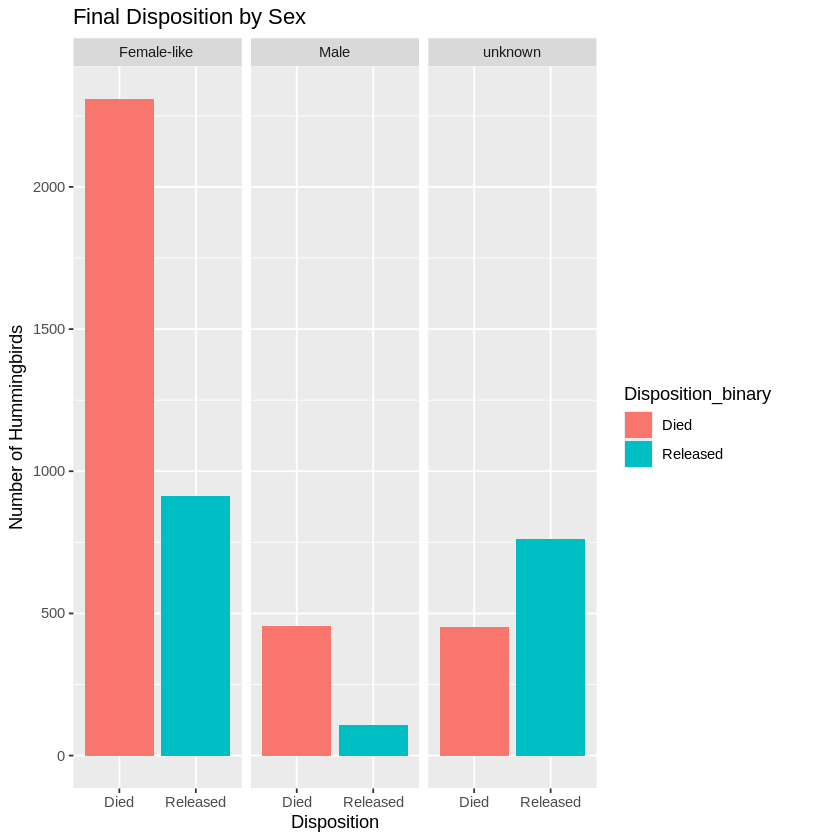

In [44]:
df_sex = model_data %>%
  group_by(Sex_e, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_sex, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Sex_e) +
  labs(title = "Final Disposition by Sex",
       x = "Disposition",
       y = "Number of Hummingbirds")



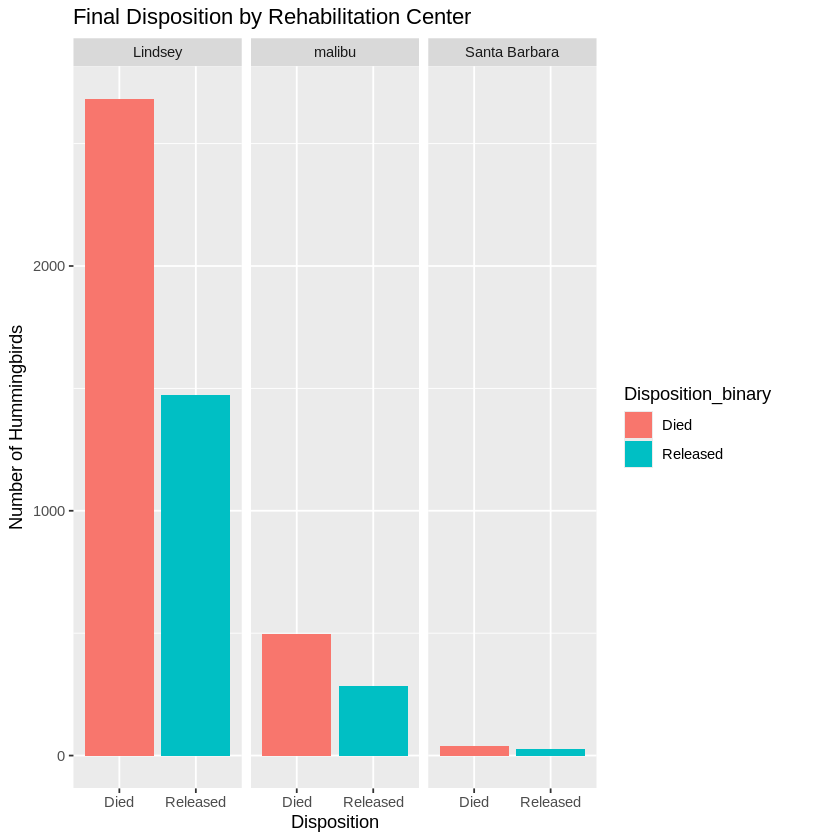

In [45]:
df_place = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_place, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ Place) +
  labs(title = "Final Disposition by Rehabilitation Center",
       x = "Disposition",
       y = "Number of Hummingbirds")


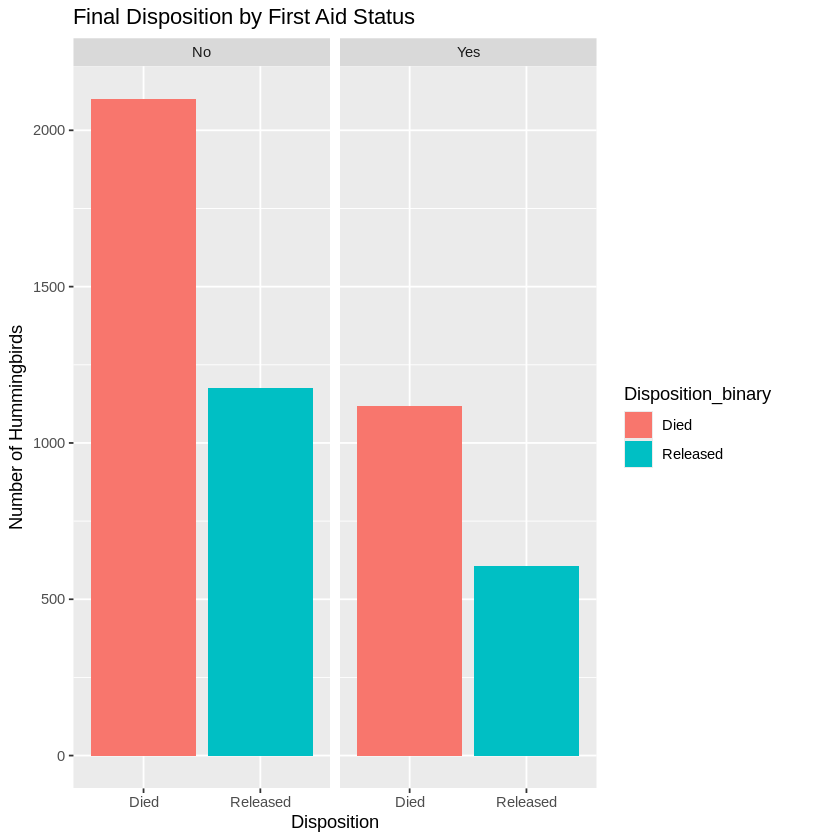

In [46]:
df_faid = model_data %>%
  group_by(F_Aid, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_faid, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ F_Aid) +
  labs(title = "Final Disposition by First Aid Status",
       x = "Disposition",
       y = "Number of Hummingbirds")


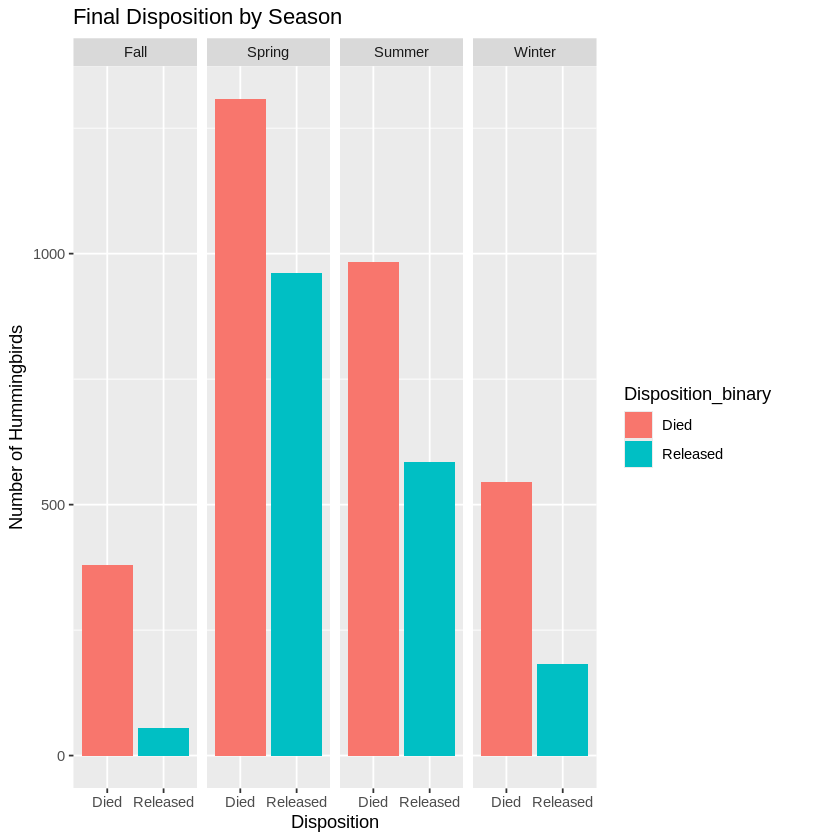

In [47]:
df_season = model_data %>%
  group_by(season, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(df_season, aes(x = Disposition_binary, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity") +
  facet_grid(. ~ season) +
  labs(title = "Final Disposition by Season",
       x = "Disposition",
       y = "Number of Hummingbirds")


## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

The table shows the proportion of hummingbirds that were released versus died for each rehabilitation center. Some centers have noticeably higher release proportions, while others show a larger proportion of deaths. This suggests differences in caseload, resources, or bird condition upon admission. The bar chart makes these center-specific differences visually clear.


Place,Disposition_binary,count,proportion
<chr>,<chr>,<int>,<dbl>
Lindsey,Died,2682,0.6456428
Lindsey,Released,1472,0.3543572
Santa Barbara,Died,40,0.5970149
Santa Barbara,Released,27,0.4029851
malibu,Died,495,0.6354300
malibu,Released,284,0.3645700


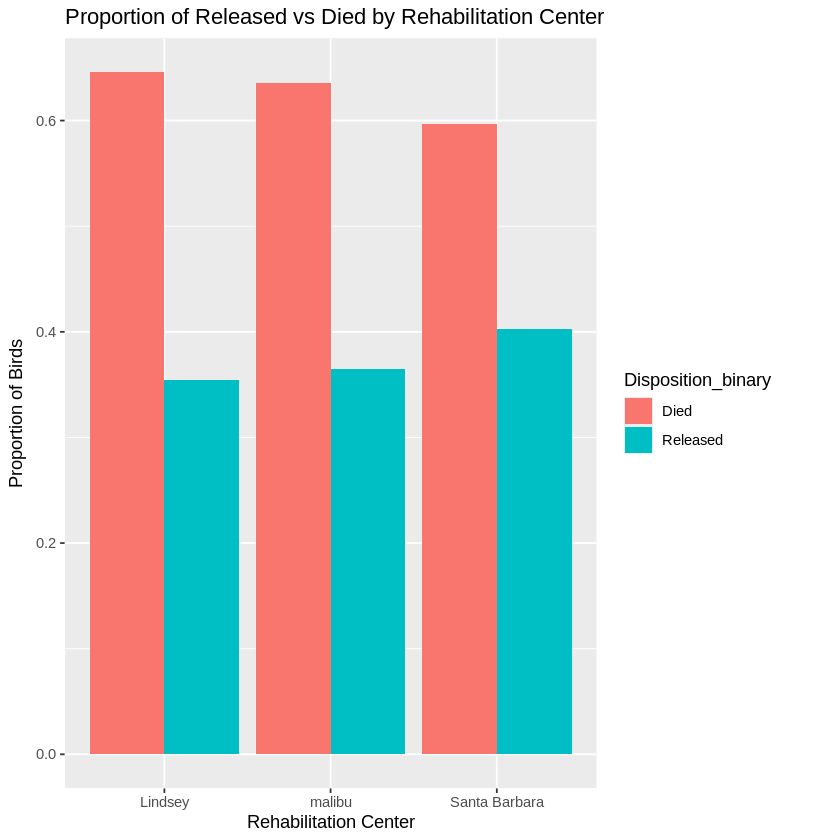

In [35]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop") %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))
proportions


# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill = Disposition_binary )) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion of Birds") +
  labs(title = "Proportion of Released vs Died by Rehabilitation Center" )

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

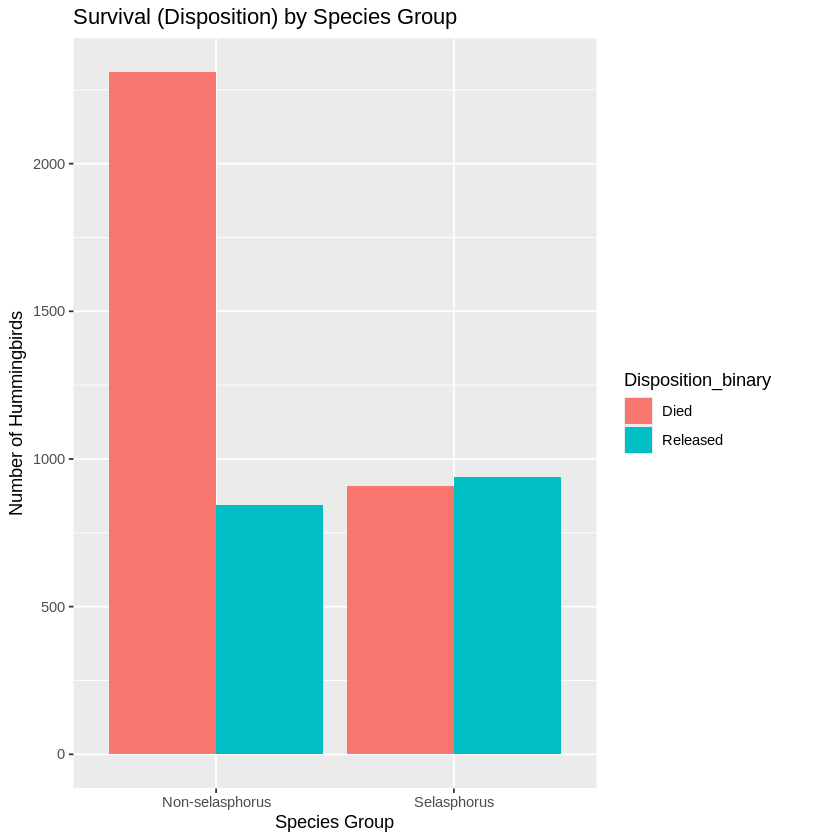

In [37]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e %in% c("ANHU", "BCHU", "NonSselasphorus"),
       "Non-selasphorus",
       "Selasphorus")


# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID), .groups = "drop")

ggplot(species_distribution,
       aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Survival (Disposition) by Species Group" )

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [38]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")


Q12a Please explain the argument `format` in code above

format = "%m/%d/%Y" tells R how to read the dates in that column.

format symbols mean:
%m -> month (01–12)
%d -> day (01–31)
%Y -> full year (1991, 2008, etc.)
The slashes / in the format must match the slashes in the data

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [39]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%Y-%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))
admissions_by_month

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))
admissions_by_year


Admitted_month,count
<chr>,<int>
1991-01,9
1991-02,2
1991-03,23
1991-04,28
1991-05,23
1991-06,18
1991-07,13
1991-08,9
1991-09,5


Admitted_year,count
<chr>,<int>
1991,138
1992,124
1993,141
1994,136
1995,139
1996,152
1997,145
1998,140
1999,139


Finally, we can use `ggplot` to plot these timelines.

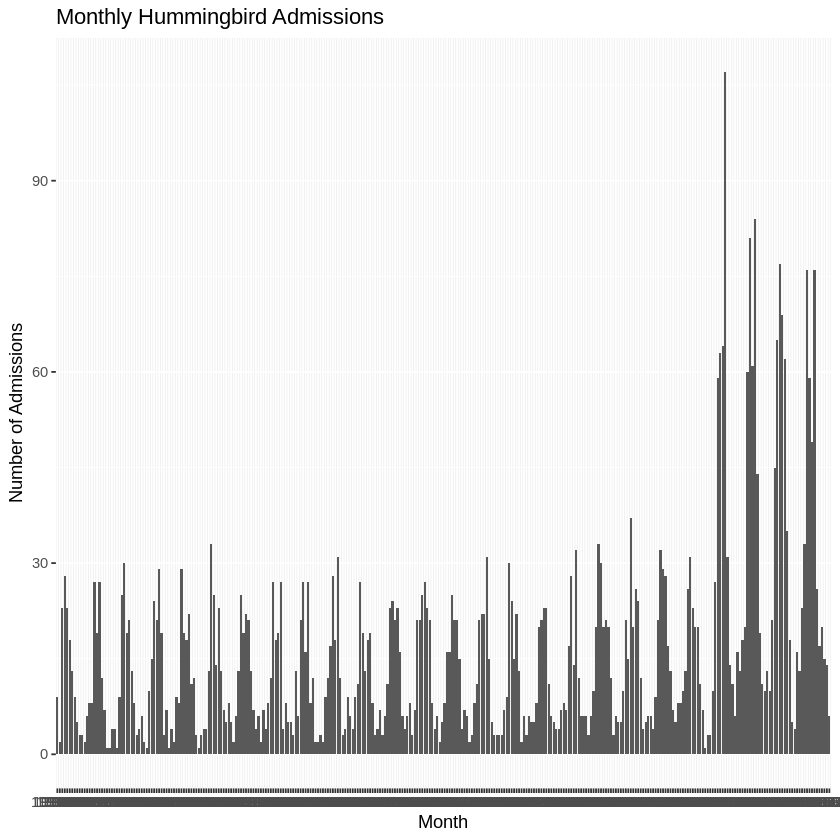

In [40]:
# Plot admissions by month
ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Month") +
  ylab("Number of Admissions") +
  labs(title = "Monthly Hummingbird Admissions")


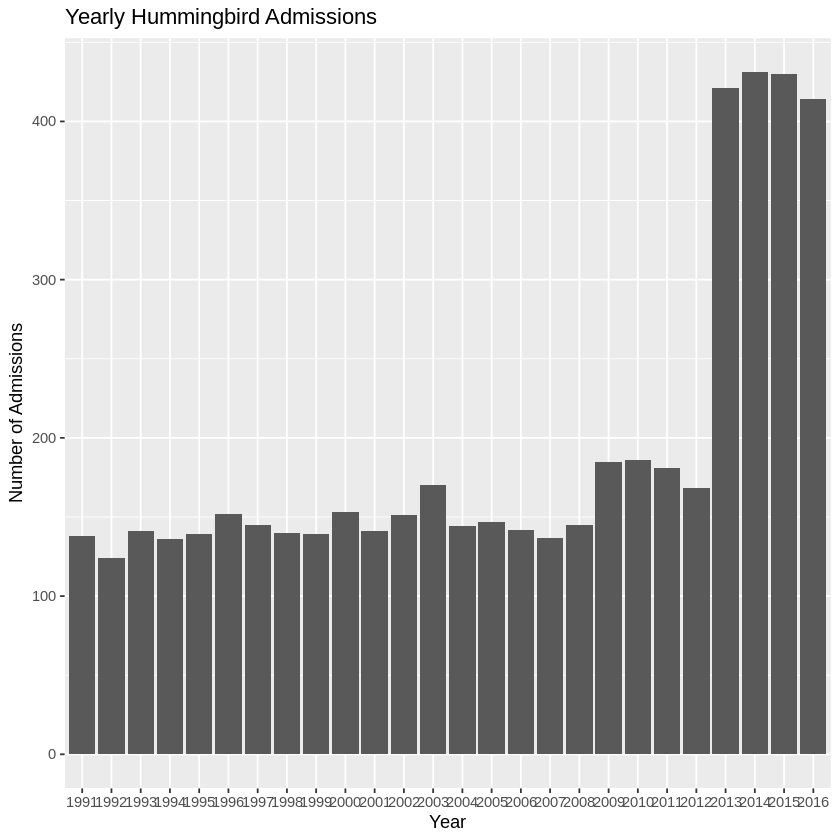

In [41]:
# Plot admissions by year
ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity") +
  xlab("Year") +
  ylab("Number of Admissions") +
  labs(title = "Yearly Hummingbird Admissions")